In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, BasicAer, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, execute

In [3]:
from qiskit.providers.ibmq import least_busy

In [4]:
n = 3
s = '011'

In [5]:
bv_circuit = QuantumCircuit(n+1, n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)
    
bv_circuit.barrier()
s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    elif s[q] == '1':
        bv_circuit.cx(q, n)

bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)
    
for i in range(n):
    bv_circuit.measure(i, i)

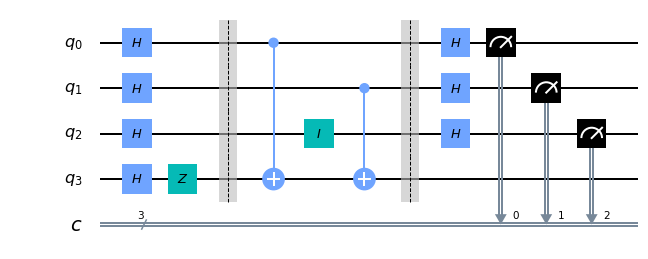

In [6]:
bv_circuit.draw(output='mpl')

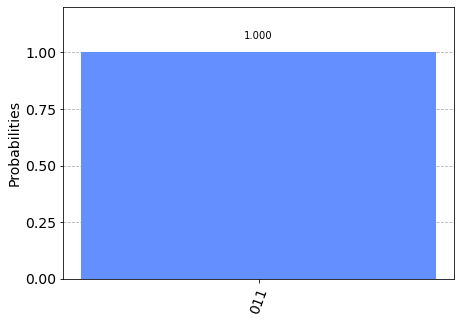

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(bv_circuit, backend).result().get_counts()
plot_histogram(count)

In [8]:
def bernstein_vazirani(s, n):
    bv_circuit = QuantumCircuit(n+1, n)
    bv_circuit.h(n)
    bv_circuit.z(n)
    for i in range(n):
        bv_circuit.h(i)
        
    bv_circuit.barrier()
    s = s[::-1]
    for index, value in enumerate(s):
        if value == '0':
            pass
        elif value == '1':
            bv_circuit.cx(index, n)
        else:
            print('Message can only contain 0 or 1!')
            return False
    
    bv_circuit.barrier()
    for i in range(n):
        bv_circuit.h(i)
    for i in range(n):
        bv_circuit.measure(i, i)
    
    return bv_circuit

In [25]:
bv_circuit = bernstein_vazirani('1010', 4)

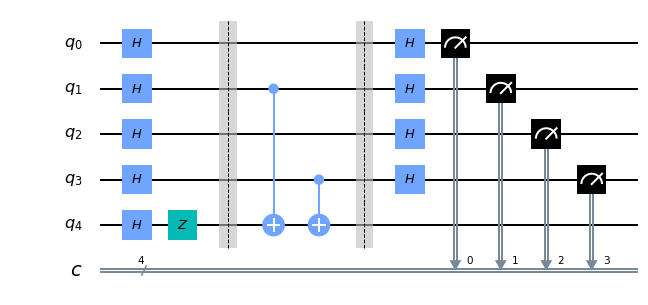

In [26]:
bv_circuit.draw(output='mpl')

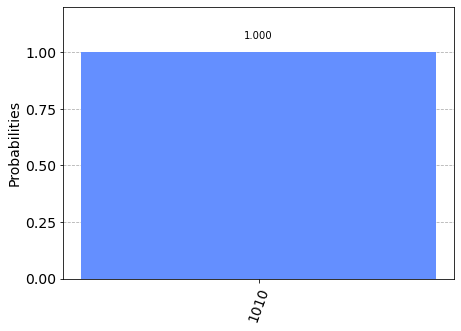

In [27]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(bv_circuit, backend).result().get_counts()
plot_histogram(count)

In [28]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-05 12:05:58,063: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [29]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 4 and
                                     not b.configuration().simulator and b.status().operational == True))

In [30]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

{'1111': 45, '1100': 20, '0010': 50, '1101': 32, '0110': 5, '1001': 18, '0101': 4, '1000': 52, '0000': 26, '0100': 3, '0111': 4, '0001': 5, '1011': 199, '1110': 71, '0011': 23, '1010': 467}


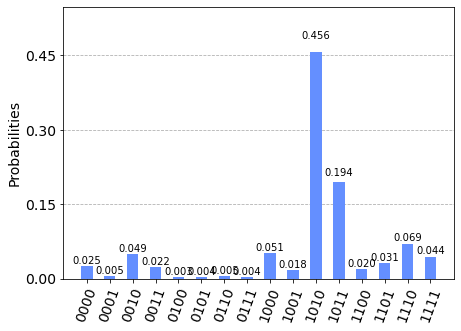

In [31]:
job_exp = execute(bv_circuit, backend, shots=1024)
job_exp_result = job_exp.result()
job_exp_count = job_exp_result.get_counts()
print(job_exp_count)
plot_histogram(job_exp_count)

In [33]:
accuracy = round((job_exp_count['1010']/1024)*100, 2)
print('The accuracy of {} on the Bernstein Vazirani algorithm was {}%'.format(backend, accuracy))

The accuracy of ibmqx2 on the Bernstein Vazirani algorithm was 45.61%
